In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [33]:
x = np.array(
    [
        0.000,
        0.010,
        0.020,
        0.030,
        0.040,
        0.051,
        0.061,
        0.071,
        0.081,
        0.091,
        0.101,
        0.111,
        0.121,
        0.131,
        0.141,
        0.152,
        0.162,
        0.172,
        0.182,
        0.192,
        0.202,
        0.212,
        0.222,
        0.232,
        0.242,
        0.253,
        0.263,
        0.273,
        0.283,
        0.293,
        0.303,
        0.313,
        0.323,
        0.333,
        0.343,
        0.354,
        0.364,
        0.374,
        0.384,
        0.394,
        0.404,
        0.414,
        0.424,
        0.434,
        0.444,
        0.455,
        0.465,
        0.475,
        0.485,
        0.495,
        0.505,
        0.515,
        0.525,
        0.535,
        0.545,
        0.556,
        0.566,
        0.576,
        0.586,
        0.596,
        0.606,
        0.616,
        0.626,
        0.636,
        0.646,
        0.657,
        0.667,
        0.677,
        0.687,
        0.697,
        0.707,
        0.717,
        0.727,
        0.737,
        0.747,
        0.758,
        0.768,
        0.778,
        0.788,
        0.798,
        0.808,
        0.818,
        0.828,
        0.838,
        0.848,
        0.859,
        0.869,
        0.879,
        0.889,
        0.899,
        0.909,
        0.919,
        0.929,
        0.939,
        0.949,
        0.960,
        0.970,
        0.980,
        0.990,
        1.000,
    ]
)

y = np.array(
    [
        0.200,
        0.117,
        0.041,
        -0.029,
        -0.093,
        -0.152,
        -0.204,
        -0.252,
        -0.295,
        -0.334,
        -0.369,
        -0.400,
        -0.428,
        -0.453,
        -0.475,
        -0.495,
        -0.513,
        -0.529,
        -0.545,
        -0.559,
        -0.573,
        -0.586,
        -0.600,
        -0.614,
        -0.628,
        -0.641,
        -0.653,
        -0.663,
        -0.671,
        -0.675,
        -0.676,
        -0.672,
        -0.664,
        -0.650,
        -0.630,
        -0.606,
        -0.577,
        -0.544,
        -0.509,
        -0.473,
        -0.436,
        -0.399,
        -0.364,
        -0.330,
        -0.300,
        -0.273,
        -0.250,
        -0.229,
        -0.211,
        -0.194,
        -0.179,
        -0.164,
        -0.149,
        -0.134,
        -0.118,
        -0.100,
        -0.080,
        -0.059,
        -0.035,
        -0.010,
        0.017,
        0.045,
        0.074,
        0.104,
        0.135,
        0.167,
        0.200,
        0.233,
        0.267,
        0.301,
        0.336,
        0.371,
        0.408,
        0.444,
        0.482,
        0.521,
        0.560,
        0.600,
        0.641,
        0.683,
        0.726,
        0.770,
        0.814,
        0.860,
        0.906,
        0.953,
        1.001,
        1.050,
        1.100,
        1.151,
        1.202,
        1.254,
        1.307,
        1.361,
        1.416,
        1.471,
        1.527,
        1.584,
        1.642,
        1.700,
    ]
)

In [34]:
# First fit a straight line using unmodified leaast squares
m = cp.Variable()
b = cp.Variable()
objective = cp.Minimize(cp.norm(cp.multiply(m, x) + b - y, 2))
problem = cp.Problem(objective)
problem.solve()
problem.status

'optimal'

In [35]:
y_affine_loss = problem.value
problem.value, m.value, b.value

(np.float64(3.569417846729601), array(1.91099408), array(-0.87251704))

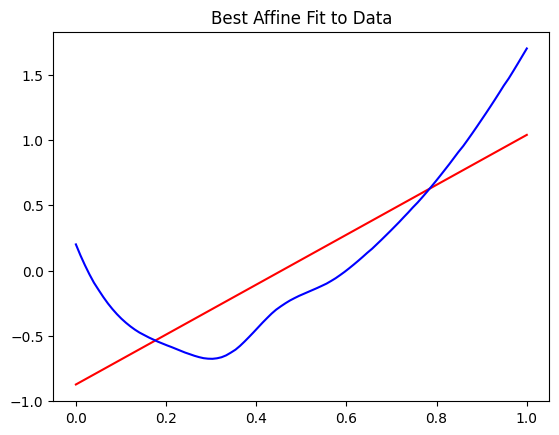

In [37]:
y_affine = m.value * x + b.value

plt.plot(x, y_affine, color="red")
plt.plot(x, y, color="blue")
plt.title("Best Affine Fit to Data")
plt.show()

In [22]:
a = np.linspace(0, 1.1, 5)
np.searchsorted(a, 0.51, side="right") - 1

np.int64(1)

In [27]:
def fit(num_internal_knot_points):
    knots = num_internal_knot_points + 2
    K = knots - 1
    a = np.linspace(0, 1.02, knots)

    m = cp.Variable(K)
    b = cp.Variable(K)
    boundary_constraints = [
        m[k - 1] * a[k] + b[k - 1] == m[k] * a[k] + b[k] for k in range(1, K)
    ]
    convexity_constraints = [m[k - 1] <= m[k] for k in range(1, K)]

    x_eval = []
    for i in range(len(x)):
        k = np.searchsorted(a, x[i], side="right") - 1
        x_eval.append(m[k] * x[i] + b[k])
    x_eval = cp.hstack(x_eval)
    objective = cp.Minimize(cp.norm(x_eval - y, 2))
    problem = cp.Problem(objective, boundary_constraints + convexity_constraints)
    problem.solve()
    assert problem.status == cp.OPTIMAL

    y_pred = []
    for i in range(len(x)):
        k = np.searchsorted(a, x[i], side="right") - 1
        y_pred.append(m.value[k] * x[i] + b.value[k])
    y_pred = np.array(y_pred)
    return problem.value, y_pred

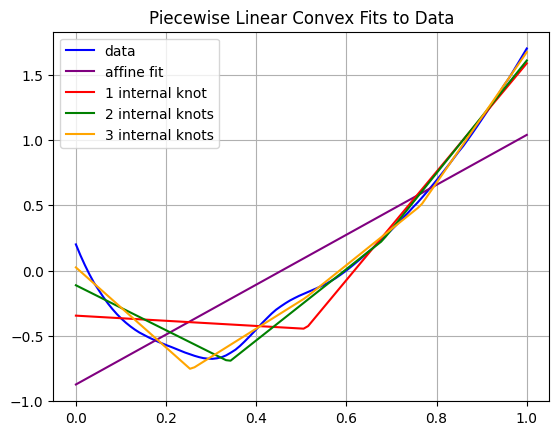

In [38]:
y_1_loss, y_1 = fit(1)
y_2_loss, y_2 = fit(2)
y_3_loss, y_3 = fit(3)

plt.plot(x, y, color="blue", label="data")
plt.plot(x, y_affine, color="purple", label="affine fit")
plt.plot(x, y_1, color="red", label="1 internal knot")
plt.plot(x, y_2, color="green", label="2 internal knots")
plt.plot(x, y_3, color="orange", label="3 internal knots")
plt.title("Piecewise Linear Convex Fits to Data")
plt.legend()
plt.grid()
plt.show()

In [39]:
print("Loss for no internal knots:", y_affine_loss)
print("Loss for 1 internal knot:", y_1_loss)
print("Loss for 2 internal knots:", y_2_loss)
print("Loss for 3 internal knots:", y_3_loss)

Loss for no internal knots: 3.569417846729601
Loss for 1 internal knot: 1.648678711607955
Loss for 2 internal knots: 0.8024902960910955
Loss for 3 internal knots: 0.4690588677270157
